In [290]:
### READ THE README.md FILE
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [291]:
taitanic=pd.read_csv("train.csv")

In [292]:
taitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [293]:
taitanic.shape

(891, 12)

In [294]:
#Which column has the most `NaN` values? How many cells in that column are empty?

In [295]:
taitanic.isnull().sum()[taitanic.isnull().sum()!=0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [296]:
#Create a bar chart showing how many missing values are in each column

Text(0.5, 1.0, 'Number of null values per column')

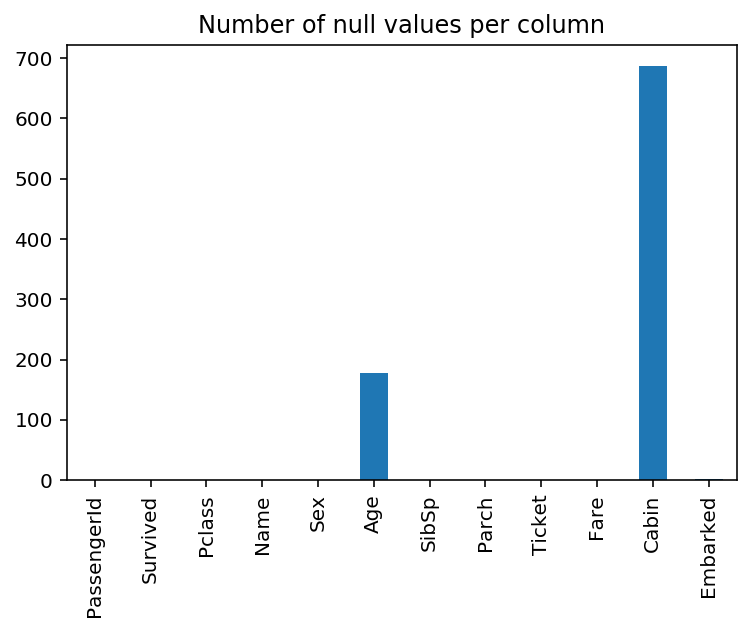

In [297]:
taitanic.isnull().sum().plot(kind="bar")
plt.title('Number of null values per column')

Text(0.5, 1.0, 'Number of null values per column')

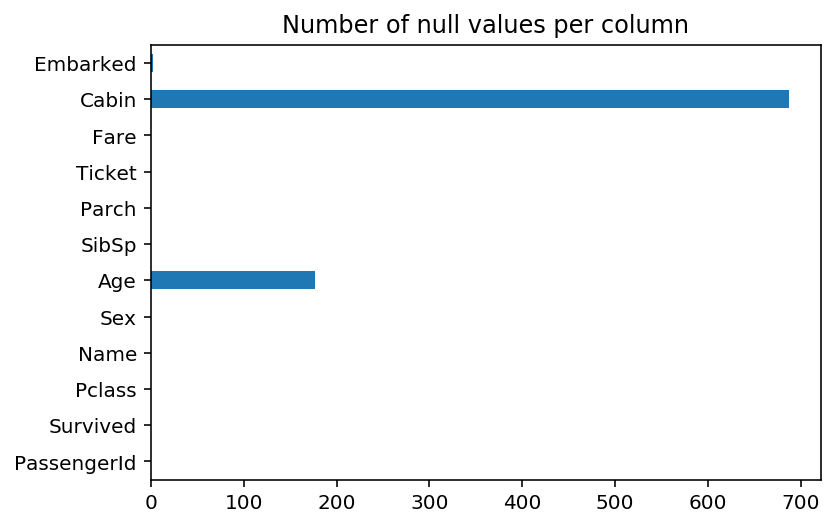

In [298]:
taitanic.isnull().sum().plot(kind="barh")
plt.title('Number of null values per column')

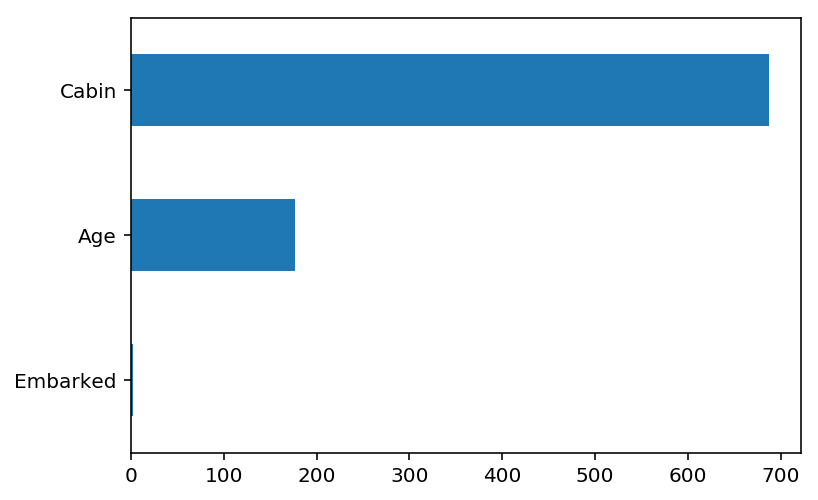

In [299]:
taitanic.isnull().sum()[taitanic.isnull().sum()!=0]\
.sort_values(ascending=True).plot(kind="barh")

In [300]:
# Delete all rows where `Embarked` is empty

In [301]:
taitanic[taitanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [302]:
taitanic=taitanic[taitanic["Embarked"].notnull()]

In [304]:
taitanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [305]:
taitanic.shape

(889, 12)

In [306]:
#Fill all empty cabins with **¯\\_(ツ)_/¯**

In [307]:
tautanic=taitanic.Cabin.fillna(value="**¯\\_(ツ)_/¯**",inplace=True)

In [308]:
taitanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [309]:
taitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S


In [310]:
#There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [311]:
taitanic["FamilyCount"]=taitanic["SibSp"]+taitanic["Parch"]

In [312]:
taitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0


In [313]:
#Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

In [314]:
def is_reverend(name):
    name1 = name.split()
    if "Rev." in str(name1):
        return 1
    else:
        return 0

In [315]:
taitanic["IsReverend"] = taitanic["Name"].apply(is_reverend)

In [316]:
taitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0,0


In [317]:
Reverend=taitanic[taitanic["IsReverend"]==1]
Reverend.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,**¯\_(ツ)_/¯**,S,0,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,**¯\_(ツ)_/¯**,S,0,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,**¯\_(ツ)_/¯**,S,1,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,**¯\_(ツ)_/¯**,Q,0,1
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,**¯\_(ツ)_/¯**,S,1,1


In [318]:
#number of reverends is
Reverend["IsReverend"].sum()

6

In [319]:
#In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
# - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column

In [320]:
taitanic = pd.get_dummies(taitanic, columns=["Embarked"])

In [321]:
taitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,0,0,0,0,1


In [322]:
#Do the same thing for `Sex`

In [323]:
taitanic_sex=pd.get_dummies(taitanic, columns=["Sex"])

In [324]:
taitanic_sex.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,0,0,0,0,1,0,1


In [325]:
#What was the survival rate overall?

In [326]:
survival=taitanic.groupby("Survived")

In [327]:
num_surv = taitanic[taitanic.columns[1]].sum()

In [328]:
print('Total number of survivors was: {}'.format(num_surv))

Total number of survivors was: 340


In [329]:
surv_rate=num_surv/len(taitanic["Survived"])*100
print('The survival rate was: {0}%'.format(surv_rate))

The survival rate was: 38.24521934758155%


In [330]:
#Which gender fared the worst? What was their survival rate?

In [331]:
male=taitanic[taitanic["Sex"]=="male"]
female=taitanic[taitanic["Sex"]=="female"]

In [332]:
surv_male=male["Survived"].sum()
surv_male
print('Total male survivors were: {}'.format(surv_male))

Total male survivors were: 109


In [333]:
surv_female=female["Survived"].sum()
surv_female
print('Total female survivors were: {}'.format(surv_female))

Total female survivors were: 231


In [334]:
surv_male_rate=surv_male/num_surv*100
surv_male_rate
print('The survival rate of male was: {}%'.format(surv_male_rate))

The survival rate of male was: 32.05882352941177%


In [335]:
surv_female_rate=surv_female/num_surv*100
surv_female_rate
print('The survival rate of female was: {}%'.format(surv_female_rate))

The survival rate of female was: 67.94117647058823%


In [336]:
taitanic.groupby('Sex')["Survived"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,312.0,0.740385,0.439128,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


In [337]:
surv_male_rate1=surv_male/577*100
surv_male_rate1
print('The overall male survival rate was: {}%'.format(surv_male_rate1))

The overall male survival rate was: 18.890814558058924%


In [338]:
surv_female_rate1=surv_female/312*100
surv_female_rate1
print('The overall female survival rate was: {}%'.format(surv_female_rate1))

The overall female survival rate was: 74.03846153846155%


In [339]:
#What was the survival rate for each `Pclass`?

In [340]:
one=taitanic[taitanic["Pclass"]==1]
two=taitanic[taitanic["Pclass"]==2]
three=taitanic[taitanic["Pclass"]==3]

In [341]:
one_surv=one["Survived"].sum()
print('PClass 1 survival was: {}'.format(one_surv))

PClass 1 survival was: 134


In [342]:
two_surv=two["Survived"].sum()
print('PClass 2 survival was: {}'.format(two_surv))

PClass 2 survival was: 87


In [343]:
three_surv=three["Survived"].sum()
print('PClass 3 survival was: {}'.format(three_surv))

PClass 3 survival was: 119


In [344]:
one_surv_rate=one_surv/num_surv*100
print('PClass 1 survival rate was: {}%'.format(one_surv_rate))

PClass 1 survival rate was: 39.411764705882355%


In [345]:
two_surv_rate=two_surv/num_surv*100
print('PClass 2 survival rate was: {}%'.format(two_surv_rate))

PClass 2 survival rate was: 25.588235294117645%


In [346]:
three_surv_rate=three_surv/num_surv*100
print('PClass 3 survival rate was: {}%'.format(three_surv_rate))

PClass 3 survival rate was: 35.0%


In [347]:
#Did any reverends survive? How many?

In [348]:
reverends=taitanic[taitanic["IsReverend"]==1]
reverends_surv=reverends["Survived"].sum()
print('Total number of reverends survival was: {}'.format(reverends_surv))

Total number of reverends survival was: 0


In [349]:
#What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [350]:
cabins=taitanic[taitanic["Cabin"]== "**¯\\_(ツ)_/¯**"]
cabins_surv=cabins["Survived"].sum()
cabins_surv_rate=cabins_surv/num_surv*100
print('survival rate by cabin marked **¯\\_(ツ)_/¯** was: {}%'.format(cabins_surv_rate))

survival rate by cabin marked **¯\_(ツ)_/¯** was: 60.588235294117645%


In [351]:
all_cabins_surv_rate=cabins_surv/687*100
print('The overall survival rate by cabin was: {}%'.format(all_cabins_surv_rate))

The overall survival rate by cabin was: 29.985443959243085%


In [352]:
#What is the survival rate for people whose `Age` is empty?

In [353]:
empty_Age=taitanic[taitanic.Age.isnull()]
empty_Age_surv=empty_Age["Survived"].sum()
age_survival_rate=empty_Age_surv/num_surv*100
print('Empty Age survival rate was: {}%'.format(age_survival_rate))

Empty Age survival rate was: 15.294117647058824%


In [354]:
# What is the survival rate for each port of embarkation?

In [355]:
Embarked_C=taitanic[taitanic["Embarked_C"]==1]
Embarked_C_surv=Embarked_C["Survived"].sum()
print('Total number of Embarked C survival was: {}'.format(Embarked_C_surv))

Total number of Embarked C survival was: 93


In [356]:
Embarked_C_surv_rate=Embarked_C_surv/num_surv*100
print('The survival rate for embarking from Cherbourg was: {}%'.format(Embarked_C_surv_rate))

The survival rate for embarking from Cherbourg was: 27.35294117647059%


In [357]:
Embarked_S=taitanic[taitanic["Embarked_S"]==1]
Embarked_S_surv=Embarked_S["Survived"].sum()
Embarked_S_surv
print('Total number of Embarked S survival was: {}'.format(Embarked_S_surv))

Total number of Embarked S survival was: 217


In [358]:
Embarked_S_surv_rate=Embarked_S_surv/num_surv*100
print('The survival rate for embarking from Southampton was: {}%'.format(Embarked_S_surv_rate))

The survival rate for embarking from Southampton was: 63.8235294117647%


In [359]:
Embarked_Q=taitanic[taitanic["Embarked_Q"]==1]
Embarked_Q_surv=Embarked_Q["Survived"].sum()
Embarked_Q_surv
print('Total number of Embarked Q survival was: {}'.format(Embarked_Q_surv))

Total number of Embarked Q survival was: 30


In [360]:
Embarked_Q_surv_rate=Embarked_Q_surv/num_surv*100
print('The survival rate for embarking from Queenstown was: {}%'.format(Embarked_Q_surv_rate))

The survival rate for embarking from Queenstown was: 8.823529411764707%


In [361]:
#What is the survival rate for children (under 12) in each `Pclass`?

In [362]:
taitanic12 = taitanic[taitanic['Age'] < 12]
survival_by_PClass= taitanic12.groupby('Pclass')['Survived'].sum()
survival_by_PClass

Pclass
1     3
2    17
3    19
Name: Survived, dtype: int64

In [363]:
total_syrvival_by_PClass=taitanic12.groupby('Pclass')['PassengerId'].count() 
total_syrvival_by_PClass

Pclass
1     4
2    17
3    47
Name: PassengerId, dtype: int64

In [364]:
survival_rate_by_PClass=survival_by_PClass/total_syrvival_by_PClass*100
survival_rate_by_PClass

Pclass
1     75.000000
2    100.000000
3     40.425532
dtype: float64

In [365]:
#Did the captain of the ship survive? Is he on the list?

In [366]:
def captin(name):
    name1 = name.split()
    if 'Smith.' in str(name1):
        return 1
    else:
        return 0
taitanic["IsCaptin"] = taitanic["Name"].apply(captin)    

In [367]:
taitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsCaptin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,1,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,0,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,0,0,0,0,1,0


In [368]:
captin1=taitanic[taitanic["IsCaptin"]==1]
captin1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsCaptin


In [369]:
print("Captain Edward John Smith was not in the list")

Captain Edward John Smith was not in the list


In [370]:
#Of all the people that died, who had the most expensive ticket? How much did it cost?

In [371]:
ticket=taitanic[taitanic['Survived']==0]
ticket1 = ticket.sort_values(by=['Fare'], ascending=False)
ticket1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsCaptin
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,5,0,0,0,1,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,5,0,0,0,1,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,1,0,1,0,0,0
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,**¯\_(ツ)_/¯**,0,0,1,0,0,0
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,0,0,0,0,1,0


In [372]:
print("Mr. Charles  has the most expensive ticket ")

Mr. Charles  has the most expensive ticket 


In [373]:
#Does having family on the boat help or hurt your chances of survival?

In [374]:
num_family=taitanic.sort_values(by='FamilyCount', ascending=False)
num_family.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsCaptin
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,**¯\_(ツ)_/¯**,10,0,0,0,1,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,**¯\_(ツ)_/¯**,10,0,0,0,1,0
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,**¯\_(ツ)_/¯**,10,0,0,0,1,0
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,**¯\_(ツ)_/¯**,10,0,0,0,1,0
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,**¯\_(ツ)_/¯**,10,0,0,0,1,0
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,**¯\_(ツ)_/¯**,10,0,0,0,1,0
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,**¯\_(ツ)_/¯**,10,0,0,0,1,0
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,**¯\_(ツ)_/¯**,7,0,0,0,1,0
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.90,**¯\_(ツ)_/¯**,7,0,0,0,1,0
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.90,**¯\_(ツ)_/¯**,7,0,0,0,1,0


In [375]:
more_one_fam=taitanic[taitanic["FamilyCount"]>=1]
more_one_fam_surv=more_one_fam.groupby("FamilyCount")["Survived"].sum()
more_one_fam_surv

FamilyCount
1     89
2     59
3     21
4      3
5      3
6      4
7      0
10     0
Name: Survived, dtype: int64

In [376]:
total_syrvival_more_one_fam_surv=more_one_fam.groupby('FamilyCount')['PassengerId'].count() 
total_syrvival_more_one_fam_surv

FamilyCount
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: PassengerId, dtype: int64

In [377]:
survival_rate=more_one_fam_surv/total_syrvival_more_one_fam_surv*100
survival_rate

FamilyCount
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
dtype: float64

In [378]:
print("families who have more members have a less chance of survival so, having family on the boat  hurt your chances of survival")

families who have more members have a less chance of survival so, having family on the boat  hurt your chances of survival


In [379]:
one_fam=taitanic[taitanic["FamilyCount"]<1]
one_fam_surv=one_fam.groupby("FamilyCount")["Survived"].sum()
one_fam_surv

FamilyCount
0    161
Name: Survived, dtype: int64

In [380]:
total_syrvival_one_fam_surv=one_fam.groupby('FamilyCount')['PassengerId'].count() 
total_syrvival_one_fam_surv

FamilyCount
0    535
Name: PassengerId, dtype: int64

In [381]:
survival_rate=one_fam_surv/total_syrvival_one_fam_surv*100
survival_rate

FamilyCount
0    30.093458
dtype: float64

In [382]:
# statistics for the data

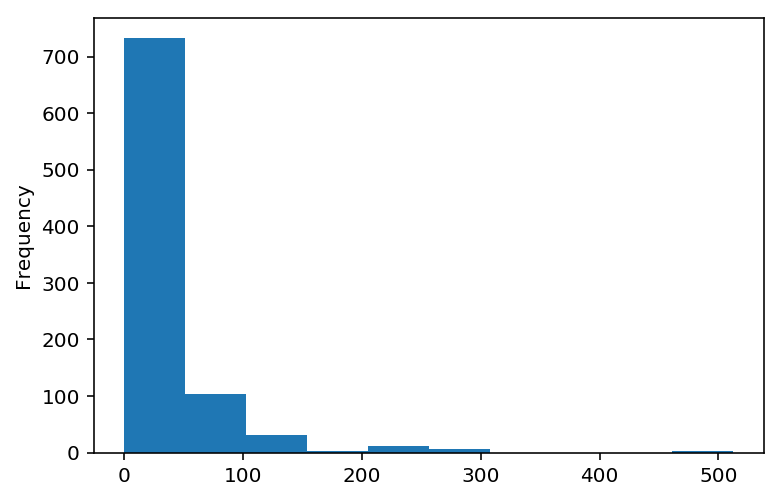

In [383]:
taitanic['Fare'].plot(kind='hist');

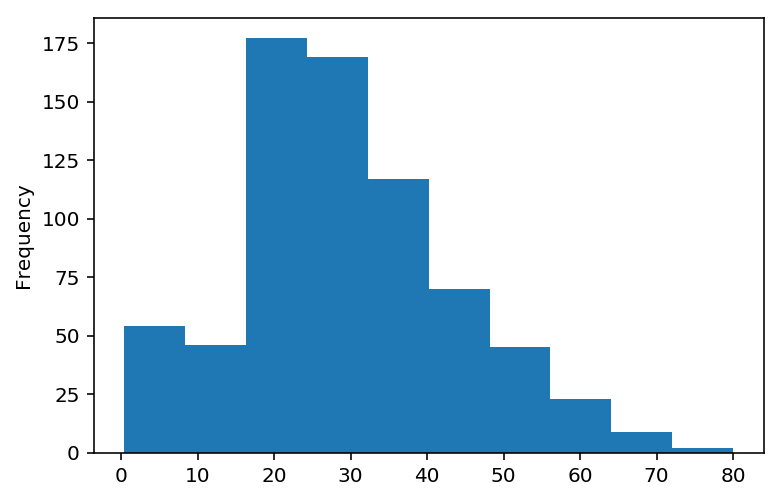

In [384]:
taitanic['Age'].plot(kind='hist');

In [385]:
for col in taitanic._get_numeric_data():
    print(col, taitanic[col].skew())

PassengerId 0.0
Survived 0.4845676297760328
Pclass -0.6369977585999191
Age 0.3888806178753708
SibSp 3.6910576308362284
Parch 2.74516012611158
Fare 4.801440211044194
FamilyCount 2.723892053975516
IsReverend 12.069168759157034
Embarked_C 1.5916097892471592
Embarked_Q 2.9444060770894613
Embarked_S -1.0061915443671179
IsCaptin 0


In [386]:
for col in taitanic._get_numeric_data():
    print(col, taitanic[col].kurt())

PassengerId -1.197156421963046
Survived -1.7691794454365986
Pclass -1.2694374832322646
Age 0.1879487930331507
SibSp 17.838972378994782
Parch 9.750591705579096
Fare 33.508477269700144
FamilyCount 9.13566385741382
IsReverend 143.9887645191334
Embarked_C 0.5344189496765539
Embarked_Q 6.684560499279373
Embarked_S -0.9898104437817947
IsCaptin 0


In [387]:
taitanic["Age"].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [388]:
taitanic["Fare"].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [413]:
taitanic.groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,259.0,27.745174,13.989760,0.75,18.0,27.0,36.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [414]:
taitanic.groupby(['Sex','Pclass'])['Age'].describe()

count       mean        std   min     25%   50%    75%   max
Sex    Pclass                                                              
female 1        83.0  34.240964  13.430572  2.00  23.000  35.0  44.00  63.0
       2        74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
       3       102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
male   1       101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
       2        99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
       3       253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0

In [415]:

taitanic.groupby(["Sex", 'Pclass'])['Age', 'Fare'].describe()

Age                                                         \
               count       mean        std   min     25%   50%    75%   max   
Sex    Pclass                                                                 
female 1        83.0  34.240964  13.430572  2.00  23.000  35.0  44.00  63.0   
       2        74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0   
       3       102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0   
male   1       101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0   
       2        99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0   
       3       253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0   

                Fare                                                     \
               count        mean        std      min       25%      50%   
Sex    Pclass                                                             
female 1        92.0  106.693750  74.969442  25.9292  56.98230  83.1583   
       2        76.0   21.970121  10.891796  10.5000  13.00000  22.0000   
       3       144.0   16.118810  11.690314   6.7500   7.85420  12.4750   
male   1       122.0   67.226127  77.548021   0.0000  27.72810  41.2625   
       2       108.0   19.741782  14.922235   0.0000  12.33125  13.0000   
       3       347.0   12.661633  11.681696   0.0000   7.75000   7.9250   

                                     
                      75%       max  
Sex    Pclass                        
female 1       134.783325  512.3292  
       2        26.062500   65.0000  
       3        20.221875   69.5500  
male   1        78.459375  512.3292  
       2        26.000000   73.5000  
       3        10.008300   69.5500

In [389]:
taitanic['Age_bins'] = pd.cut(taitanic['Age'], bins=[0,18,65,99], labels=['child', 'adult', 'old'])
taitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsCaptin,Age_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,1,0,0,0,1,0,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,0,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,0,0,0,0,1,0,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1,0,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,0,0,0,0,1,0,adult


In [390]:
#Plotting

Text(0.5, 1.0, 'Age distribution across sex')

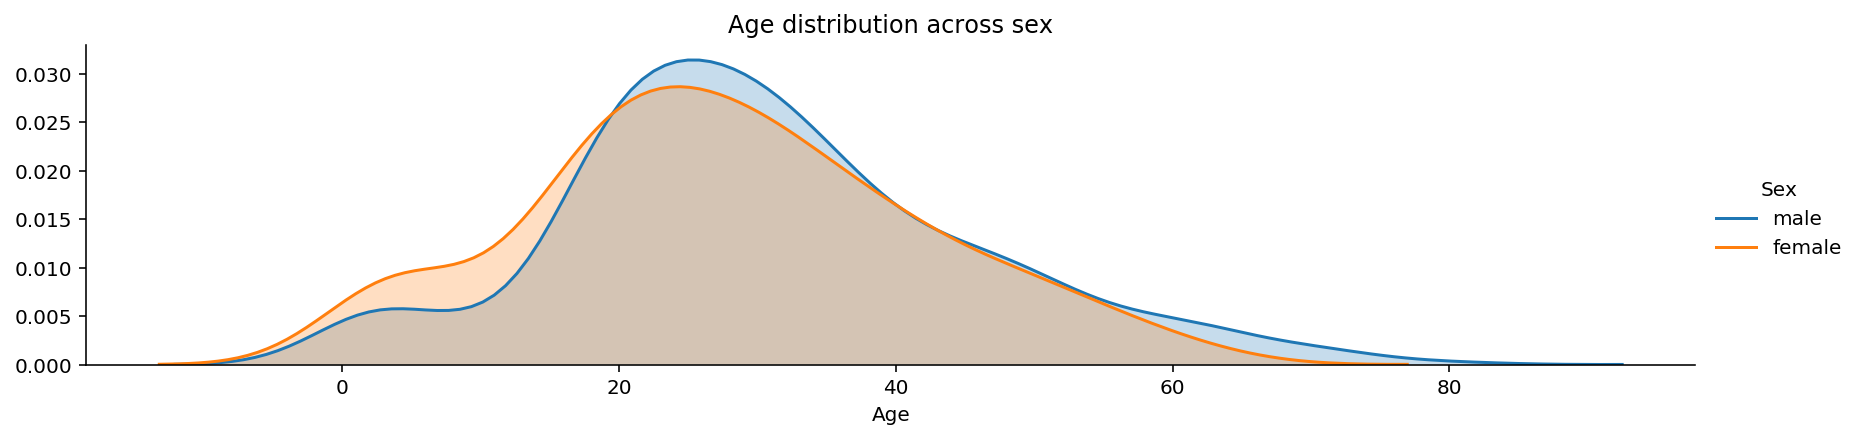

In [391]:
age_sex = sns.FacetGrid(taitanic, hue="Sex", aspect=4)
age_sex.map(sns.kdeplot, "Age", shade=True).add_legend()
plt.title("Age distribution across sex")

Text(0.5, 1.0, 'Age distribution across Pclass')

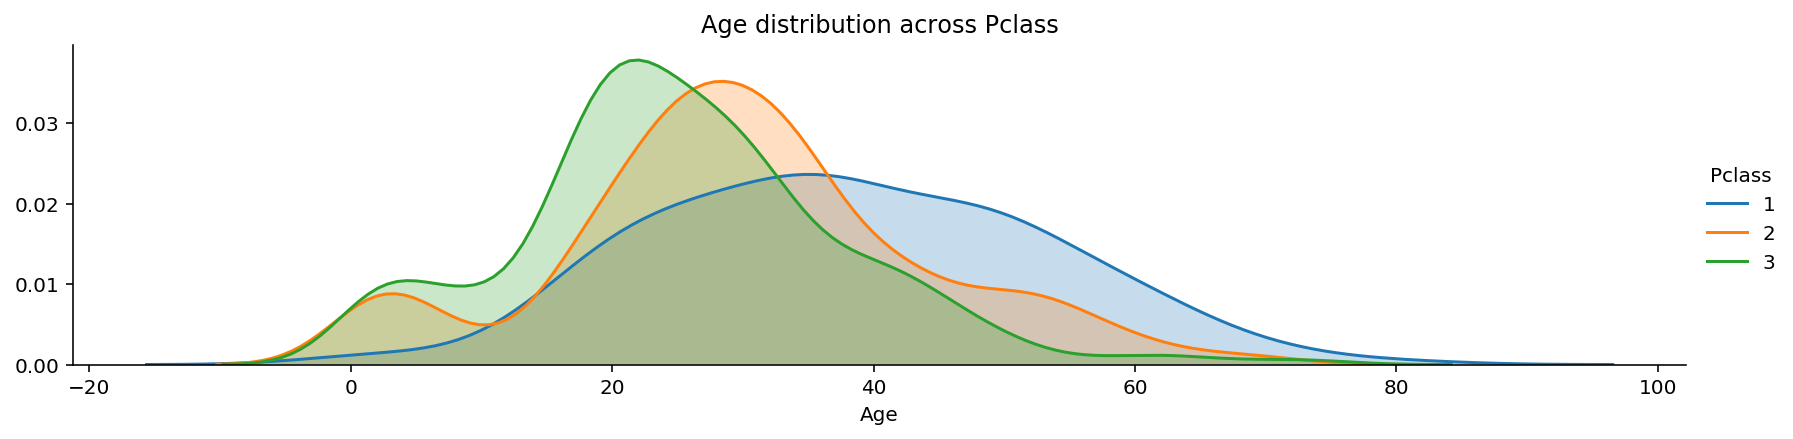

In [392]:
age_Pclass = sns.FacetGrid(taitanic, hue="Pclass", aspect=4)
age_Pclass.map(sns.kdeplot, "Age", shade=True).add_legend()
plt.title("Age distribution across Pclass")

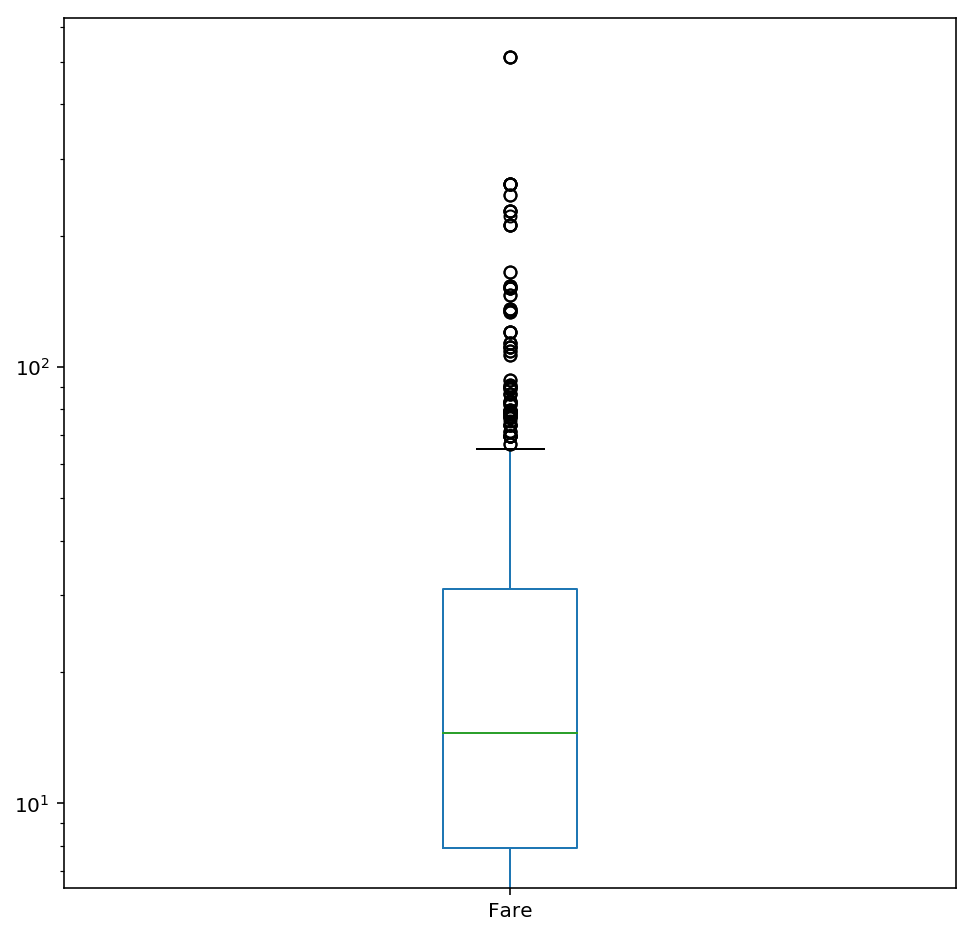

In [393]:
ax=taitanic['Fare'].plot(kind='box',figsize=(8,8));
ax.set_yscale("log")

Text(0.5, 1.0, 'The number of male and female in each class')

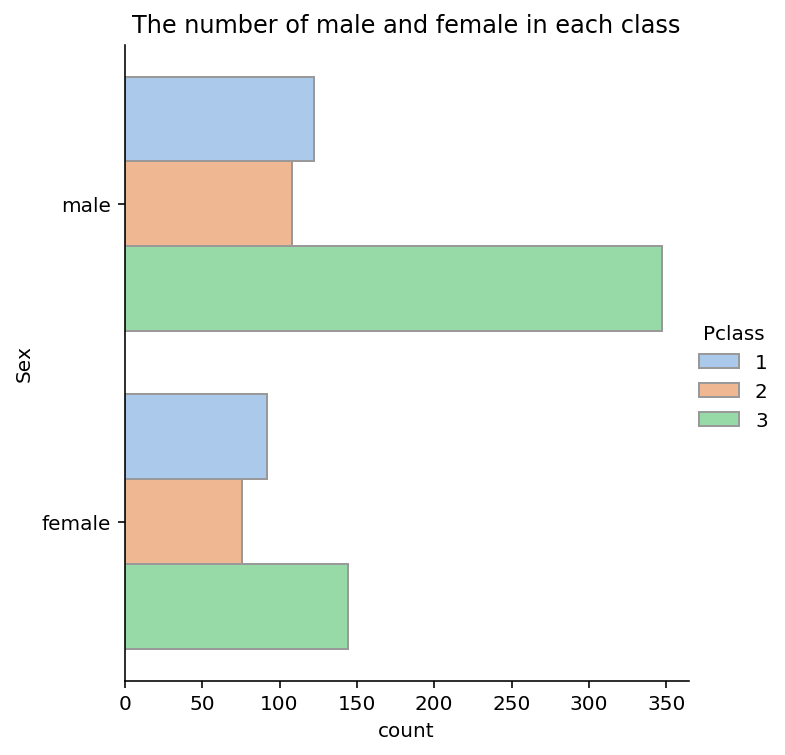

In [394]:
sns.catplot(y="Sex", hue="Pclass", kind="count",
            palette="pastel", edgecolor=".6",
            data=taitanic);
plt.title("The number of male and female in each class")

Text(0.5, 1.0, 'The number of male and female was survival')

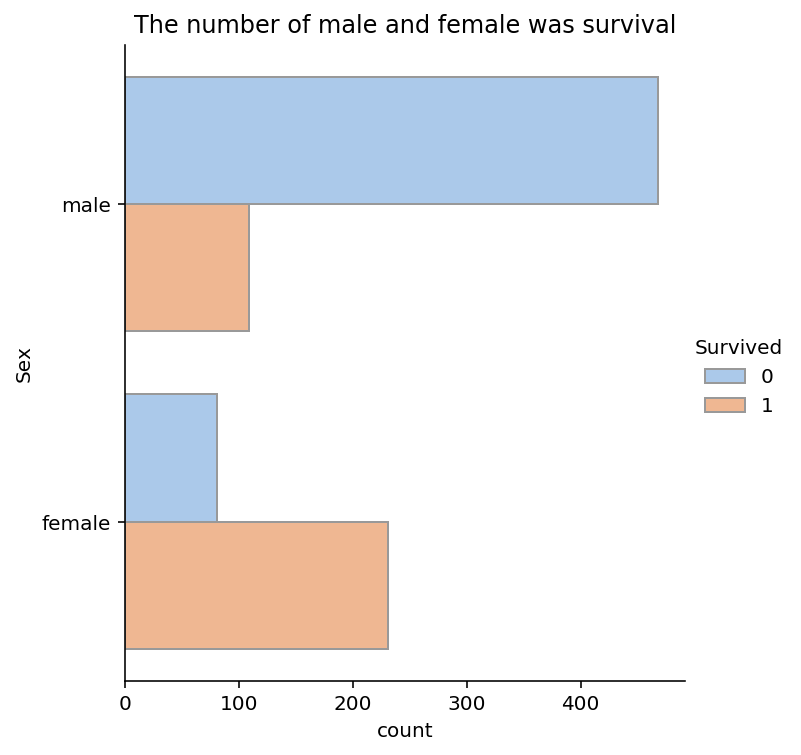

In [395]:
sns.catplot(y="Sex", hue="Survived", kind="count",
            palette="pastel", edgecolor=".6",
            data=taitanic);
plt.title("The number of male and female was survival")

Text(0.5, 1.0, 'The number of child,adult and old was survival')

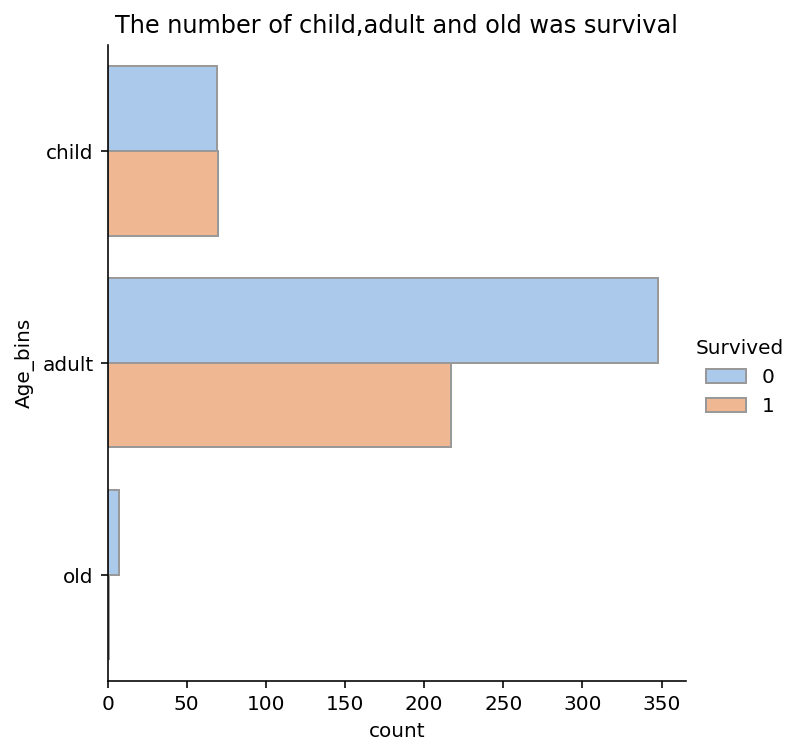

In [398]:
sns.catplot(y="Age_bins", hue="Survived", kind="count",
            palette="pastel", edgecolor=".6",
            data=taitanic);
plt.title("The number of child,adult and old was survival")

C:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


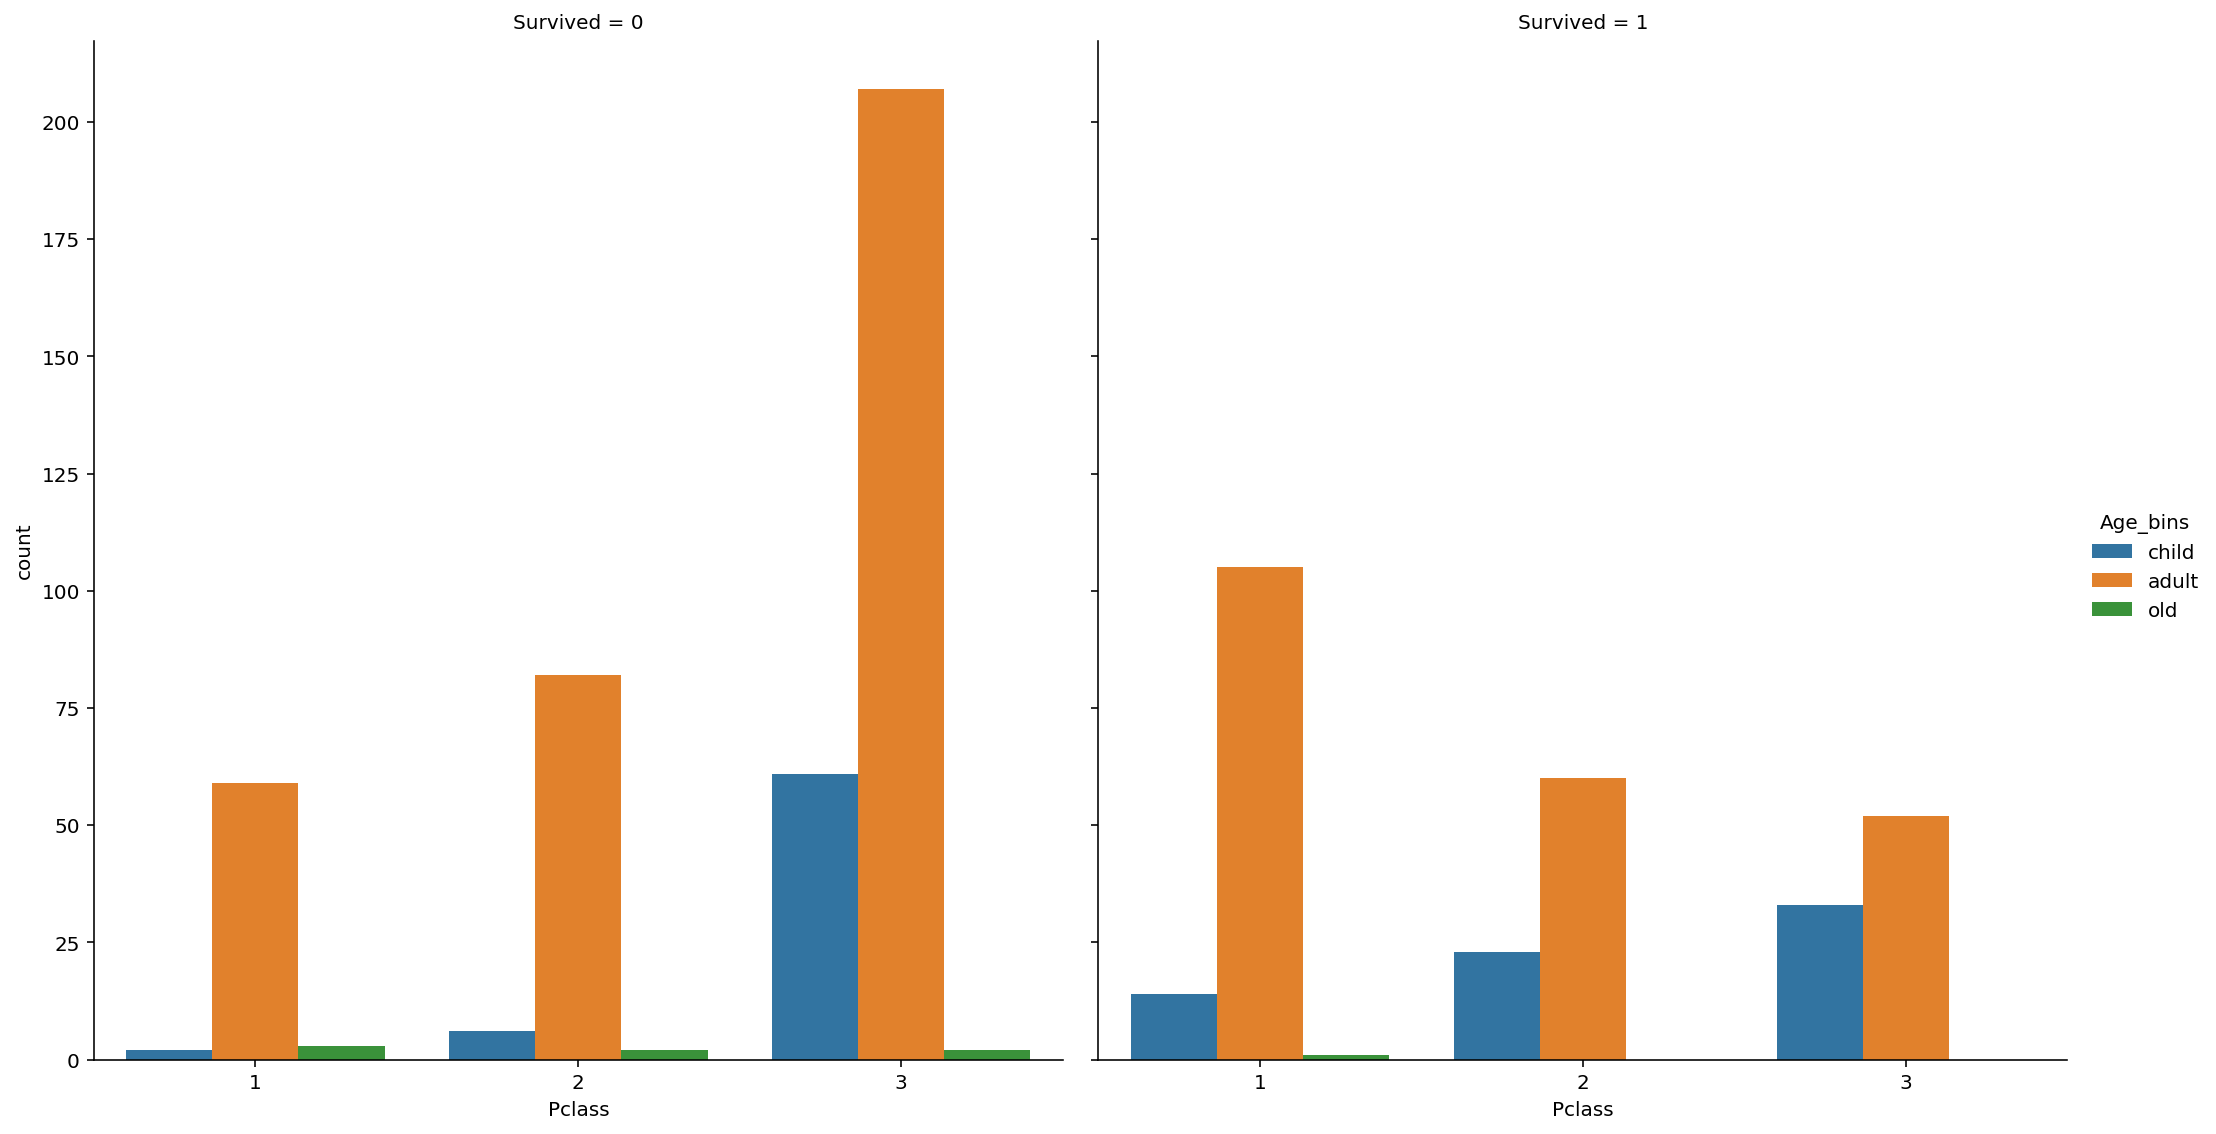

In [399]:
sns.factorplot(x="Pclass", hue="Age_bins", col="Survived", data=taitanic, kind="count",size=8, aspect=.9)

In [400]:
def kids_or_not(age_class):
    age, sex=age_class
    if age<16:
        return "Kid"
    else:
        return dict(male="Man", female="Woman")[sex]
        

In [401]:
taitanic["person"] = taitanic[["Age", "Sex"]].apply(kids_or_not,axis=1)

In [402]:
taitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsCaptin,Age_bins,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,1,0,0,0,1,0,adult,Man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,0,adult,Woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,0,0,0,0,1,0,adult,Woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1,0,adult,Woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,0,0,0,0,1,0,adult,Man


C:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


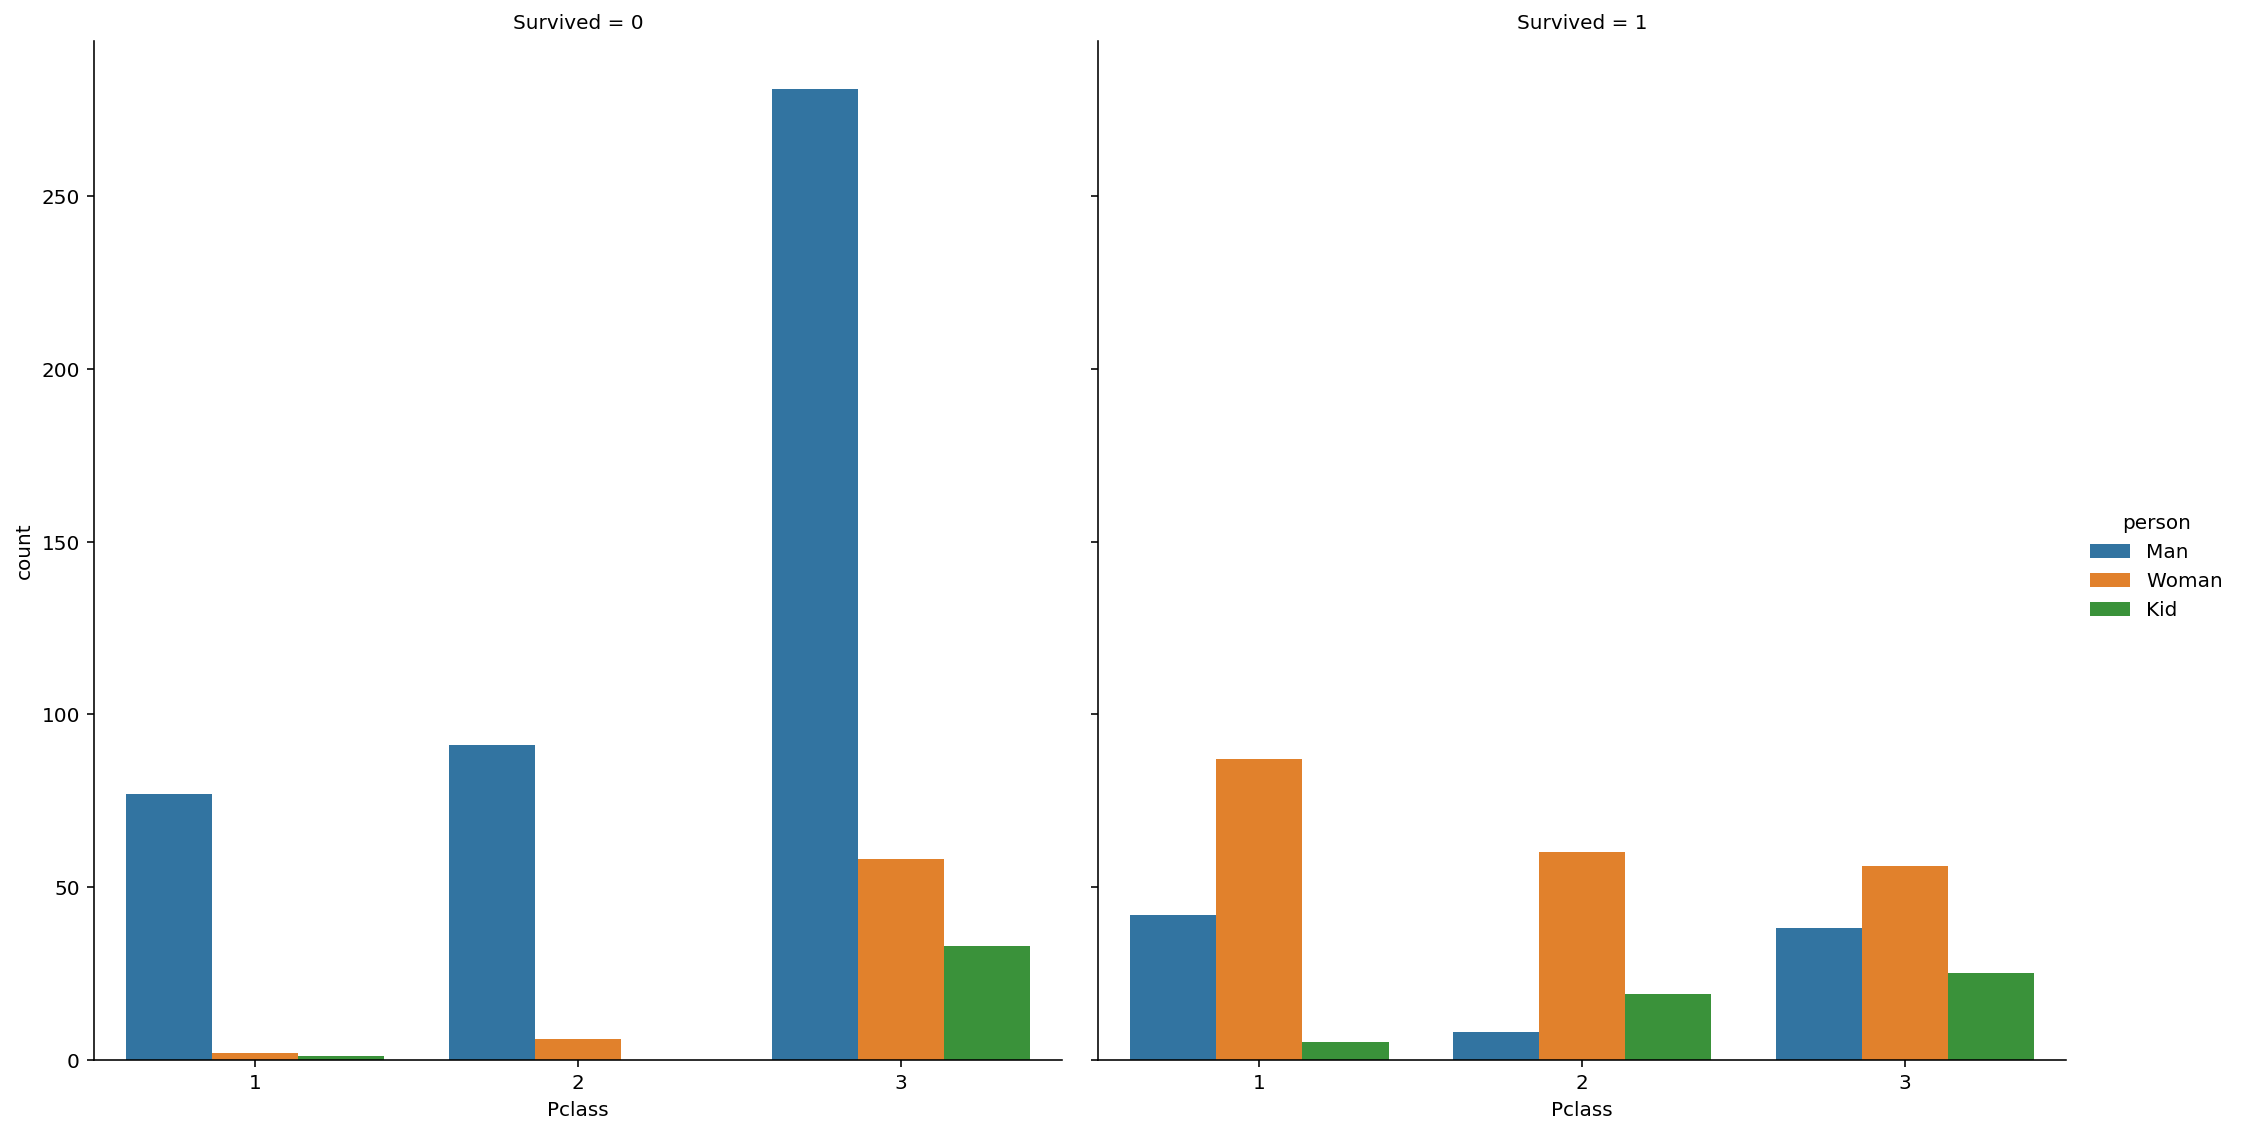

In [403]:
sns.factorplot(x="Pclass", hue="person", col="Survived", data=taitanic, kind="count",size=8, aspect=.9)

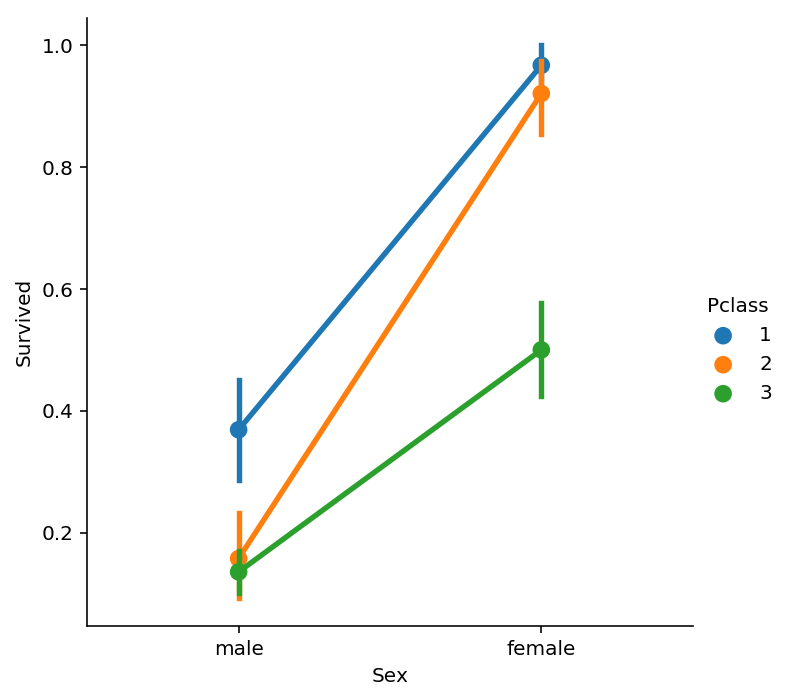

In [404]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data=taitanic);

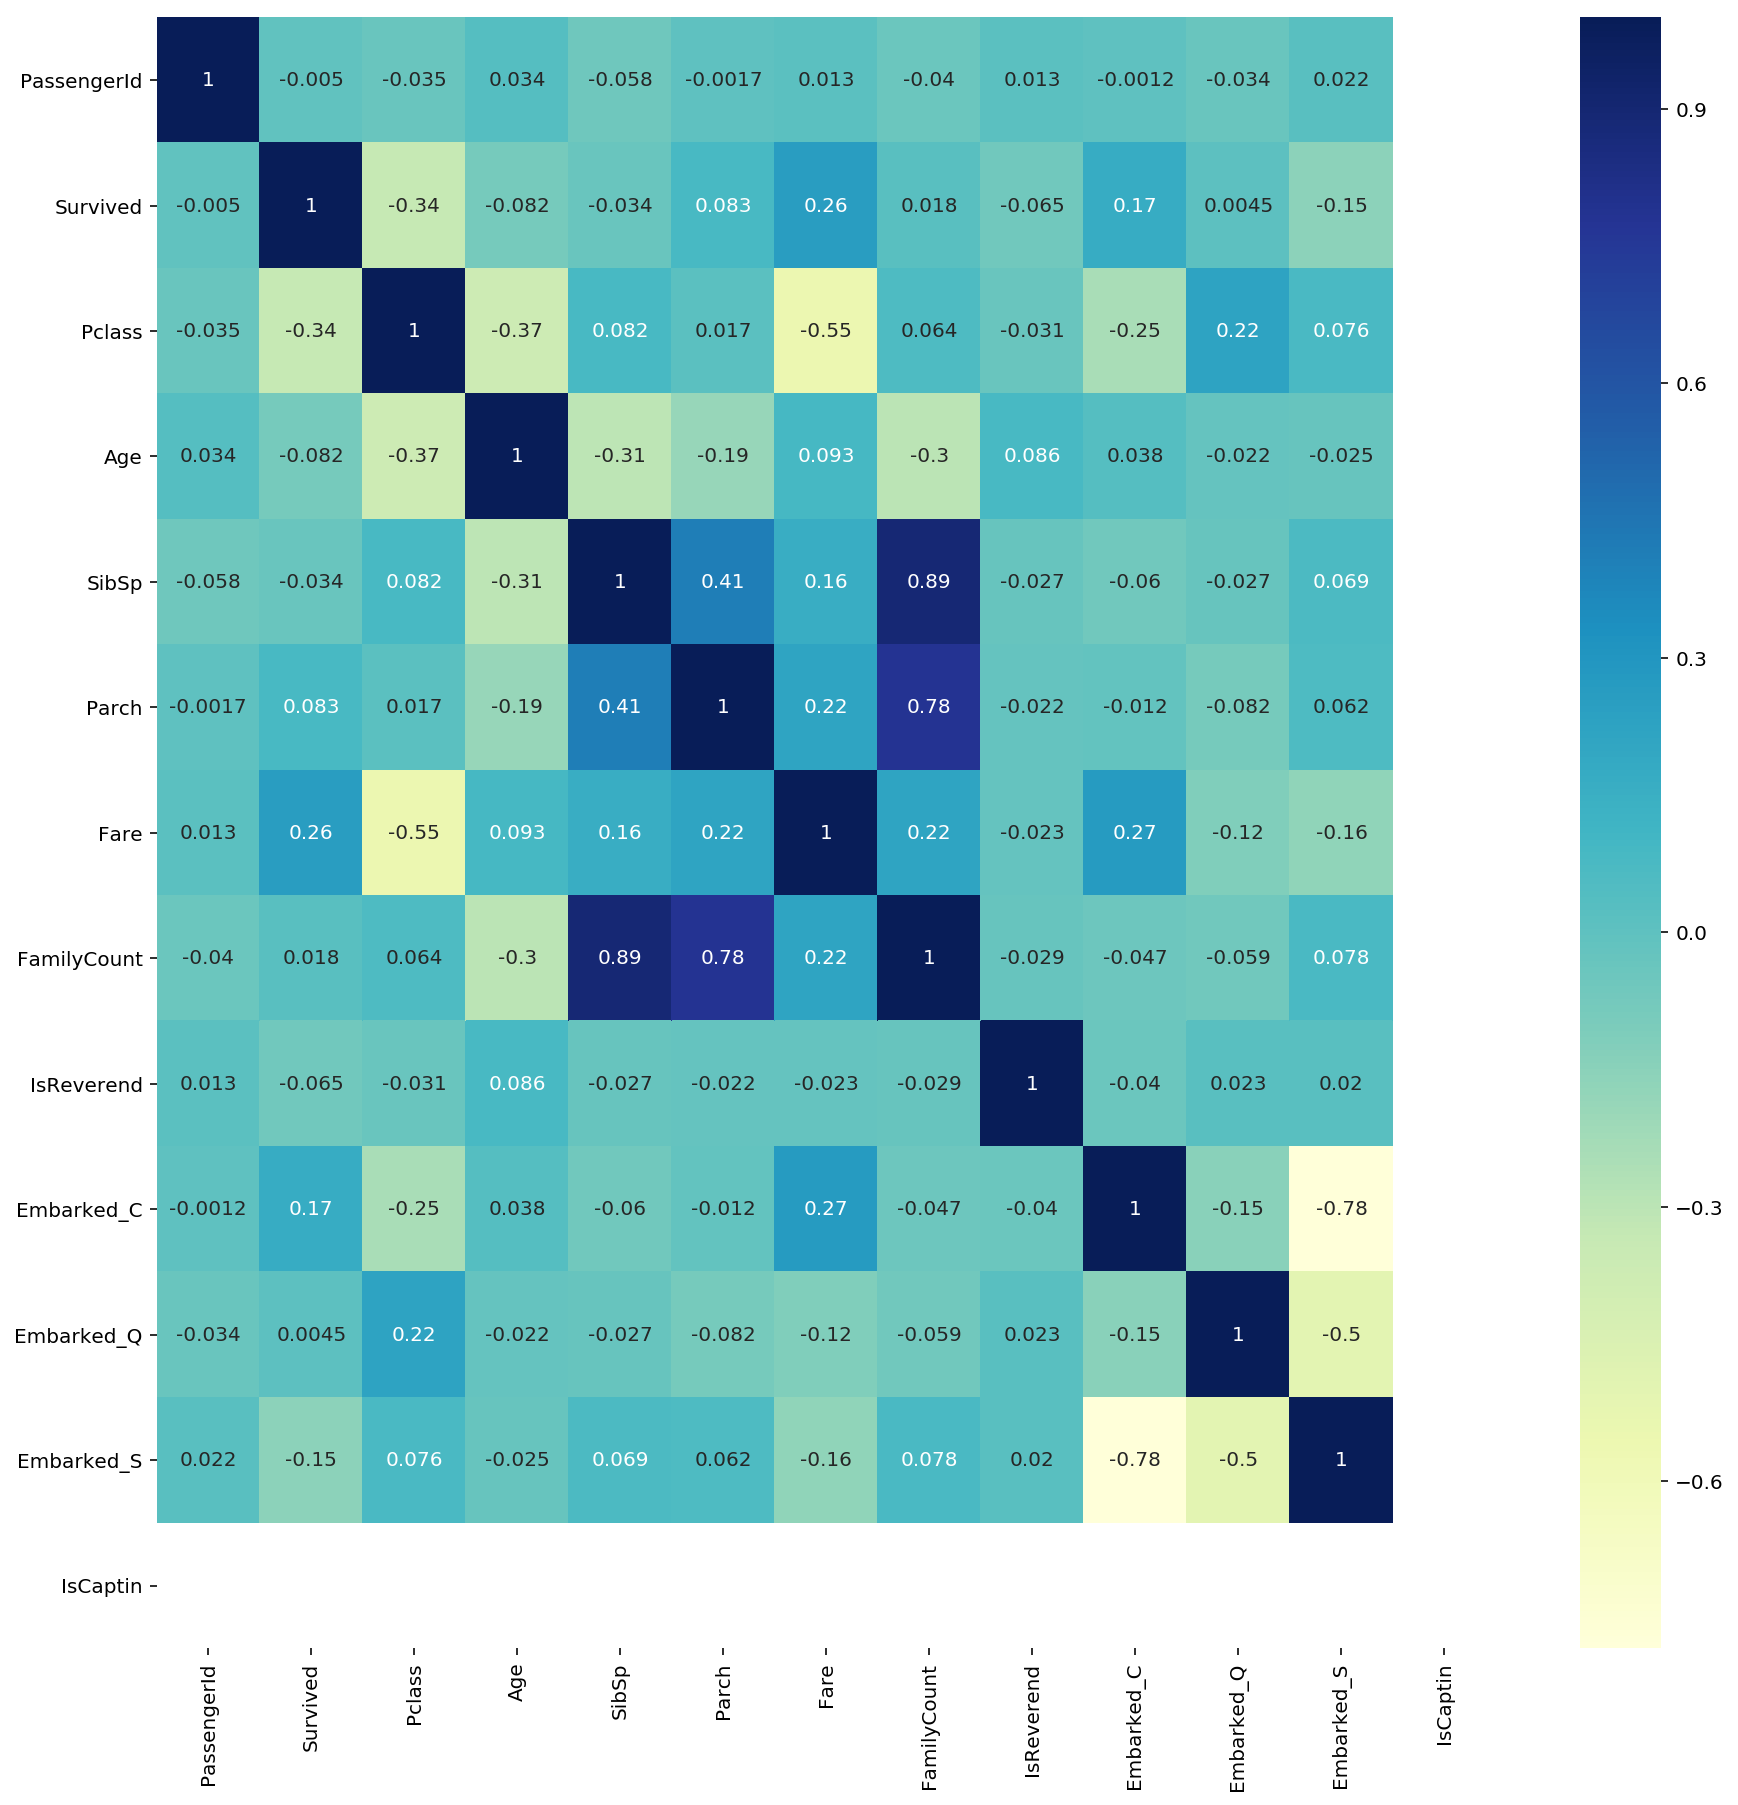

In [405]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(taitanic.corr(), annot = True,cmap="YlGnBu")

Text(0.5, 1.0, 'Number of passenger in each class')

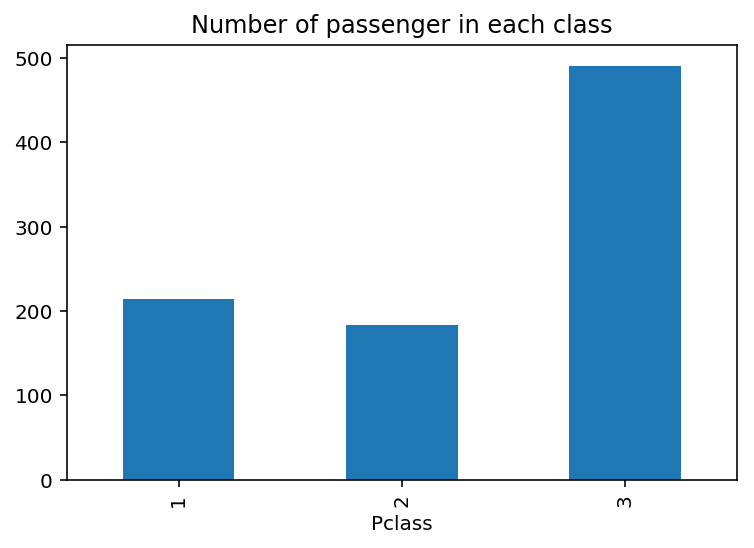

In [406]:
taitanic.groupby("Pclass")["PassengerId"].count().plot(kind="bar",)
plt.title("Number of passenger in each class")

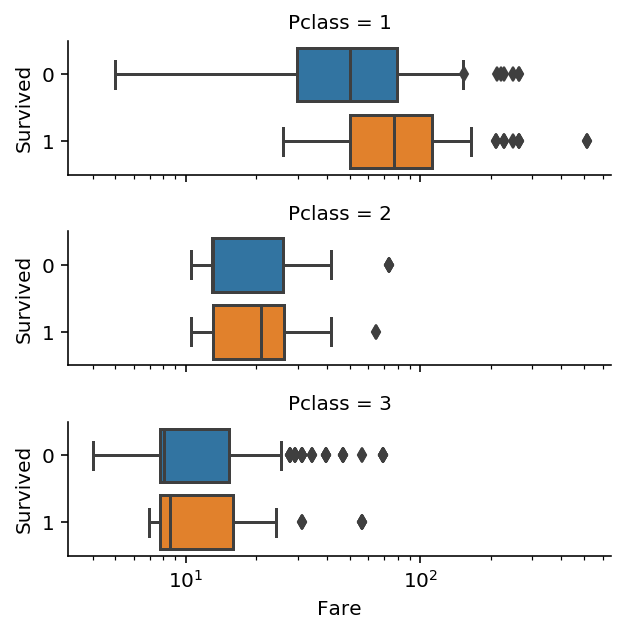

In [407]:
ax = sns.catplot(x="Fare", y="Survived", row="Pclass",
                kind="box", orient="h", height=1.5, aspect=3,
                data=taitanic.query("Fare > 0"))
ax.set(xscale="log");

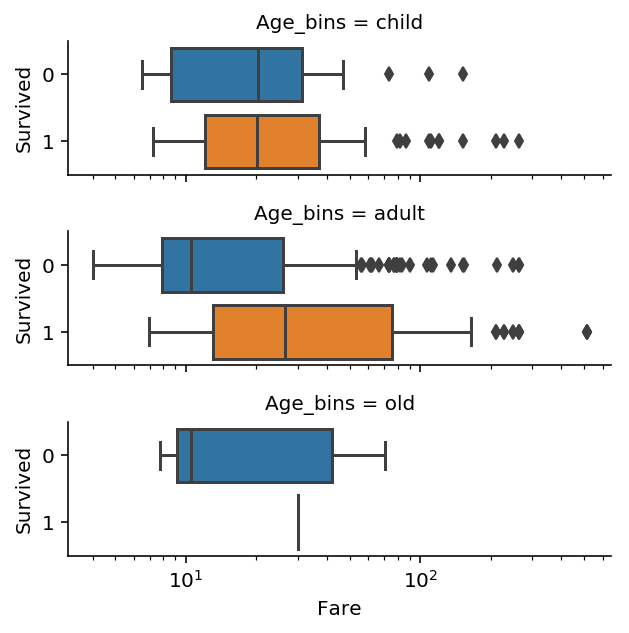

In [409]:
ax = sns.catplot(x="Fare", y="Survived", row="Age_bins",
                kind="box", orient="h", height=1.5, aspect=3,
                data=taitanic.query("Fare > 0"))
ax.set(xscale="log");

Text(0.5, 1.0, 'Fare distribution across survived')

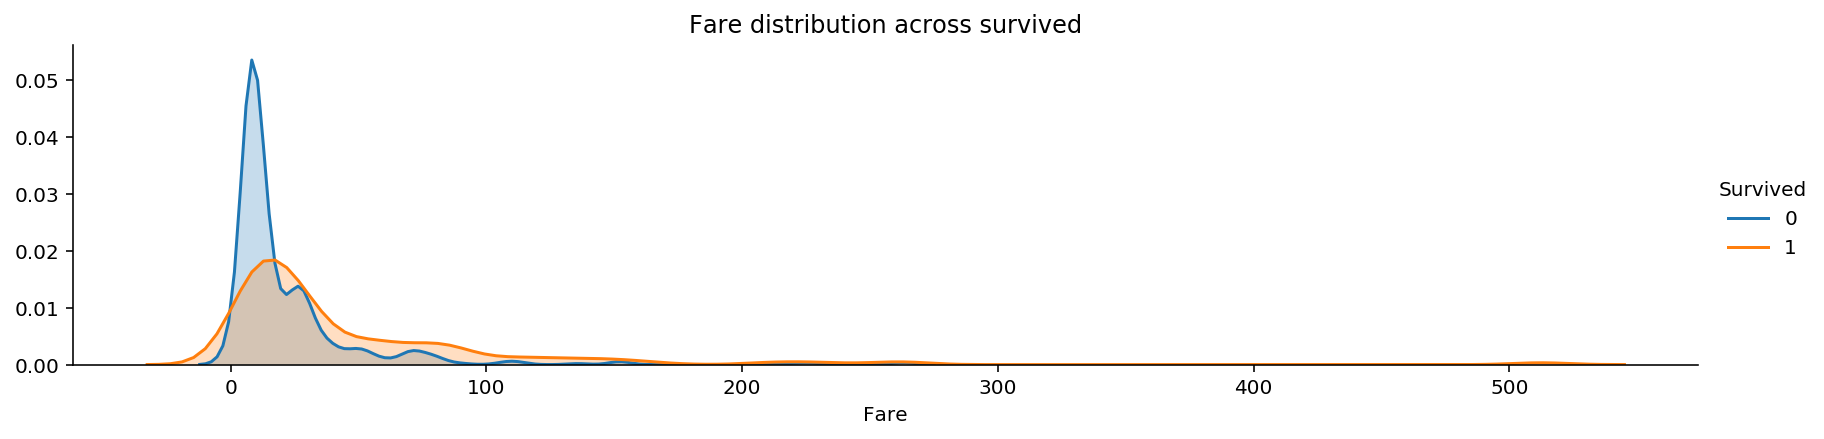

In [410]:
sur_fare= sns.FacetGrid(taitanic, hue="Survived", aspect=4)
sur_fare.map(sns.kdeplot, "Fare", shade=True).add_legend()
plt.title("Fare distribution across survived")